In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
Datos=pd.read_csv('heart_cleveland_upload.csv')

In [26]:
#lectura de los datos para el analisis exploratorio
Datos.head(35)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [28]:
#descripcion de los datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

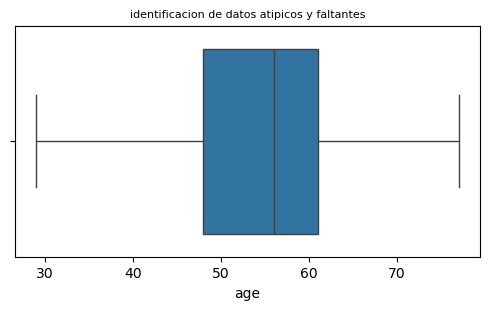

In [34]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['age'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

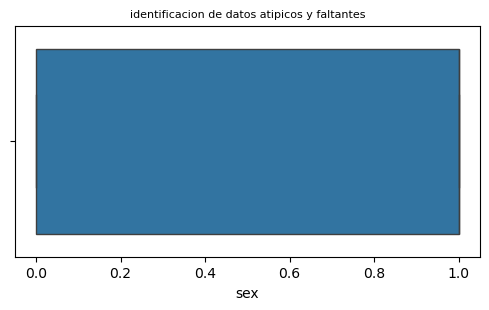

In [36]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['sex'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

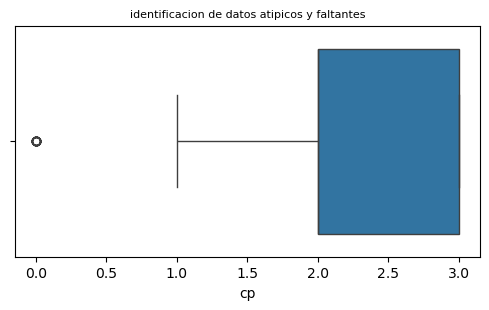

In [38]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['cp'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

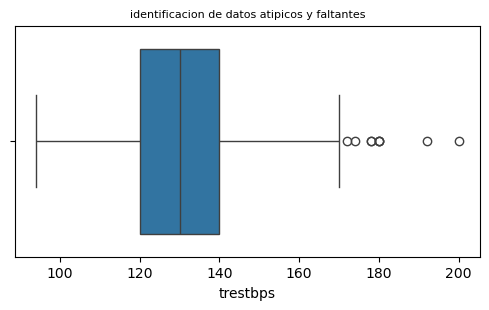

In [40]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

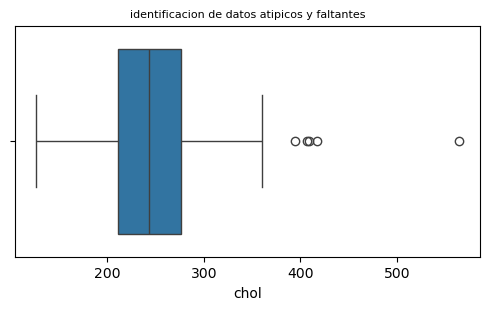

In [42]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

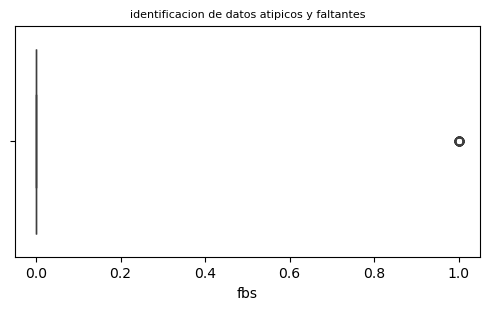

In [44]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['fbs'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

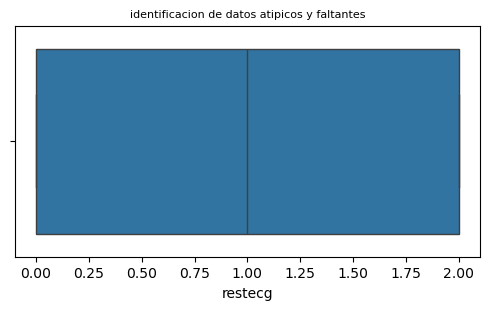

In [46]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['restecg'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

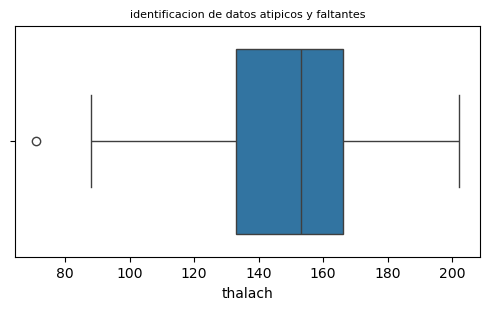

In [48]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

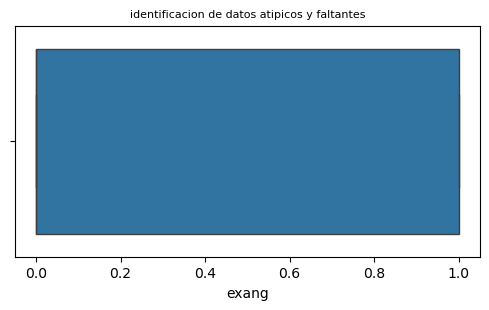

In [50]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['exang'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

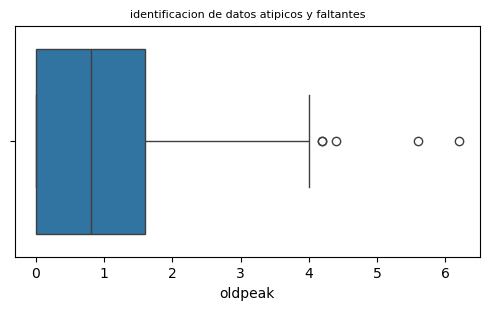

In [54]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

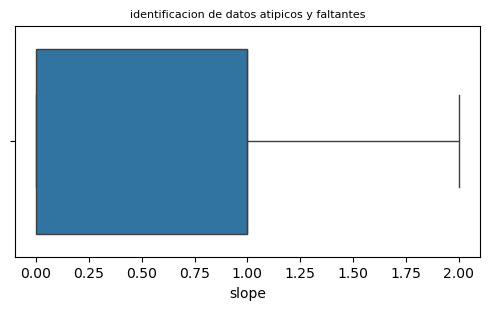

In [56]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['slope'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

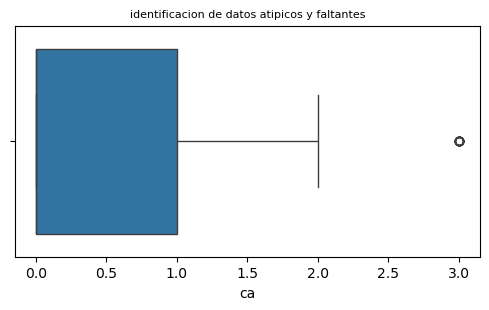

In [58]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['ca'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

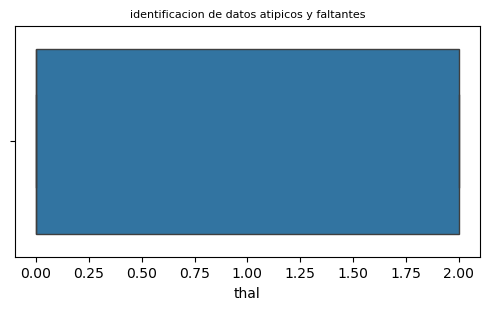

In [60]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thal'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

Text(0.5, 1.0, 'identificacion de datos atipicos y faltantes')

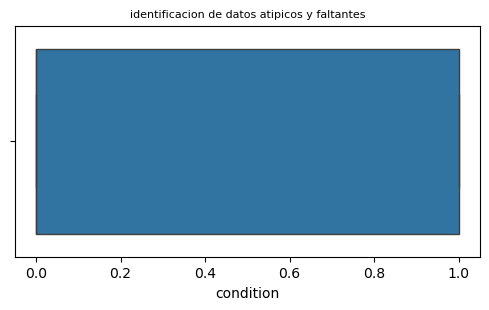

In [62]:
#identificacion de valores atipicos y faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['condition'])
plt.title('identificacion de datos atipicos y faltantes',fontsize=8) 

In [78]:
#revision de datos faltantes

print('cantidad de registros con 190 en nivel de trestbps: ',Datos['trestbps'].isin([190]).sum()) #trestpbs es presion arterial en reposo
print('cantidad de registros con 400 en nivel chol: ',Datos['chol'].isin([400]).sum()) #chol es colesterol serico
print('cantidad de registros con 5 en nivel oldpeak: ',Datos['oldpeak'].isin([5]).sum()) #oldpeak es depresion del segmento ST incluida por el ejercicio en relacion con el reposo

cantidad de registros con 190 en nivel de trestbps:  0
cantidad de registros con 400 en nivel chol:  0
cantidad de registros con 5 en nivel oldpeak:  0


In [76]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [84]:
#si la persona tiene una enfermedad cardiaca (1= si tiene, 0= no tiene)
#total de personas con la enfermedad

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [86]:
Datos[['condition']].head(35)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [101]:
# Verifica si 'Datos' está cargado correctamente
print(Datos.head())  # Muestra las primeras filas del dataset
print(Datos.columns)  # Asegúrate de que la columna 'condition' existe


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [133]:
#dividir el dataset en Train y Test
#Train (80%) y test(20%)
#se crean variables X y Y para almacenar la informacion del entrenamiento

X= Datos.drop('condition',axis=1)
Y= Datos['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state = 0)

In [135]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
261   51    1   3       140   261    0        2      186      1      0.0   
121   51    0   2       140   308    0        2      142      0      1.5   
12    59    1   0       134   204    0        0      162      0      0.8   
141   44    1   2       120   226    0        0      169      0      0.0   
29    62    1   1       128   208    1        2      140      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
174   64    1   3       120   246    0        2       96      1      2.2   
294   35    1   3       120   198    0        0      130      1      1.6   
135   46    0   2       142   177    0        2      160      1      1.4   
252   53    1   3       123   282    0        0       95      1      2.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
261      0   0     0  
121      0   1     0  
12       0   2    

In [139]:
print (Y_train)

261    0
121    0
12     1
141    0
29     0
      ..
174    1
294    1
135    0
252    1
246    1
Name: condition, Length: 237, dtype: int64


In [141]:
#construir modelo de regresion logistica

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)

#crear el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [143]:
print (Y_test)

129    1
7      1
162    1
183    1
264    1
263    1
279    1
35     1
280    1
224    1
272    0
177    0
111    0
97     0
255    1
51     0
211    1
117    0
151    0
249    0
163    1
94     0
77     0
47     0
55     0
149    0
33     1
202    1
218    0
39     0
230    1
116    0
271    0
42     0
244    1
96     1
30     0
108    0
131    0
201    1
110    0
270    1
216    1
285    0
198    1
76     1
89     0
63     0
168    1
14     0
235    1
105    0
217    1
185    1
46     0
160    1
148    0
137    0
43     0
276    0
Name: condition, dtype: int64


In [145]:
print (Prediccion)

[1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]


In [147]:
#desempeño de modelo de regresion

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



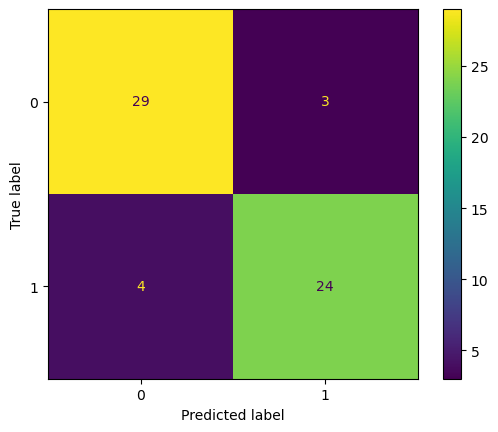

In [149]:
#matriz de confusion del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

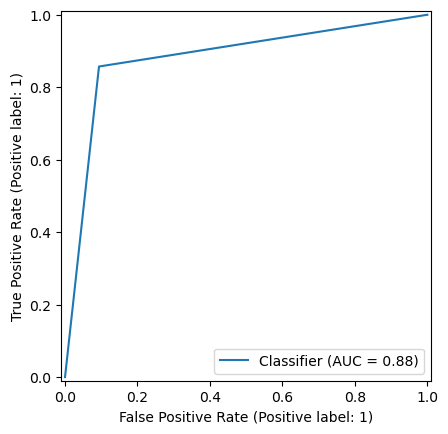

In [151]:
#curva de precision del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# Desempeño del  modelo

-Precision: la precision para la clase 'condition' es de 0.89, lo que significa que el 89% de los predichos con la enfermedad cardiaca por el modelo si tenian la enfermedad cardiaca

-Recall: recall para la clase 'condition' es de 0.86, lo que significa que el modelo apredijo el 86% de los pacientes con la enfermedad cardiaca

-F1 Score: la puntuacion de F1 Score es de 0.87, lo que significa que hay un equilibrio entre precision y recuperacion 

# matriz de confusion

verdaderos negativos:el modelo predijo correctamente los pacientes que no tenian la enfermedad cardiaca como 29
verdaderos positivos:el modelo predijo correctamente los pacientes que si tenian la enfermedad cardiaca como 24
falsos negativos:el modelo predijo incorrectamente los pacientes que no tenian la enfermedad cardiaca como 3
falsos positivos:el modelo predijo incorrectamente los pacientes que si tenian la enfermadas cardiaca como 4

# curva de precision

el AUC es de 0.88, lo que significa que el 88% de las predicciones del modelo son correctas